In [1]:
import glob
import gzip
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

def getMatrix(root):
    files = glob.glob(root + "/*/*.gz")
    matrix = list()
    for i in files:
        expfile = gzip.open(i)
        matrix.append([])
        for lines in expfile:
            expression = lines.decode("utf-8").rstrip().split()[1]
            matrix[-1].append(float(expression))
        expfile.close()
    return matrix

luadmatrix = getMatrix("luad")
luscmatrix = getMatrix("lusc")

data = luadmatrix + luscmatrix
category = [0] * len(luadmatrix) + [1] * len(luscmatrix)

In [2]:
genenames = list()
expfile = gzip.open("lusc/5dd30ba1-2051-42f6-8fb4-3c49c93b8bf1/6976923e-a954-4ba0-9d1d-f97d7373ba48.FPKM.txt.gz")
for lines in expfile:
    gname = lines.decode("utf-8").split()[0]
    genenames.append(gname)
expfile.close()

I have identified two highly differentiated expression. Now I try to find the indices of them.

In [3]:
for i in range(len(genenames)):
    if genenames[i] == "ENSG00000189064.8" or genenames[i] == "ENSG00000178363.4":
        print(i, genenames[i])

22442 ENSG00000178363.4
43184 ENSG00000189064.8


In [4]:
twogene = list()
X = list()
Y = list()
for i in range(len(data)):
    row = list()
    row.append(data[i][22442]) #ENSG00000178363.4
    row.append(data[i][43184]) #ENSG00000189064.8
    X.append(data[i][22442])
    Y.append(data[i][43184])
    twogene.append(row)

Train SVM using linear kernel.

In [5]:
mysvm = svm.SVC(kernel = "linear", gamma=0.001)
mysvm.fit(twogene, category)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Plot the normalized expression and the decision boundles.

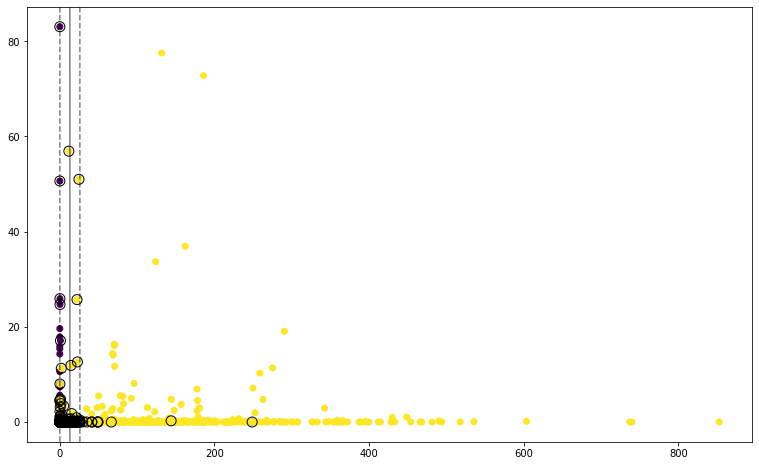

In [7]:
%matplotlib inline

plt.figure(figsize = (13,8))
plt.scatter(X, Y, c = category)
ax = plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = mysvm.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(mysvm.support_vectors_[:, 0], mysvm.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()